In [1]:
#!/usr/bin/python

import sys
import os
import pickle

# Appending paths for udacity modules 
sys.path.append("C:/Users/Gabriel/Documents/udacity/machine-learning/ud120-projects/tools")
sys.path.append("C:/Users/Gabriel/Documents/udacity/machine-learning/ud120-projects/final_project")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

os.chdir("C:/Users/Gabriel/Documents/udacity/machine-learning/ud120-projects/final_project")

C:\Users\Gabriel\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print sys.path

['', 'C:\\Users\\Gabriel\\Anaconda2\\python27.zip', 'C:\\Users\\Gabriel\\Anaconda2\\DLLs', 'C:\\Users\\Gabriel\\Anaconda2\\lib', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\plat-win', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\lib-tk', 'C:\\Users\\Gabriel\\Anaconda2', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages\\Sphinx-1.5.6-py2.7.egg', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages\\win32', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages\\setuptools-27.2.0-py2.7.egg', 'C:\\Users\\Gabriel\\Anaconda2\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Gabriel\\.ipython', 'C:/Users/Gabriel/Documents/udacity/machine-learning/ud120-projects/tools', 'C:/Users/Gabriel/Documents/udacity/machine-learning/ud120-projects/final_project', '../tools/']


In [3]:
### Load the dictionary containing the dataset

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [4]:
data_dict['ALLEN PHILLIP K']

{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}

In [5]:
data_dict.keys()

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

In [6]:
### Task 2: Remove outliers
features_list = ['poi','salary', 'bonus', 'from_messages', 'to_messages', 
                 'from_poi_to_this_person', 'from_this_person_to_poi', 
                 'shared_receipt_with_poi', 'exercised_stock_options', 'total_stock_value']
my_dataset = data_dict
data = featureFormat(my_dataset, features_list, sort_keys = True)
data

array([[  0.00000000e+00,   2.01955000e+05,   4.17500000e+06, ...,
          1.40700000e+03,   1.72954100e+06,   1.72954100e+06],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   2.57817000e+05,   2.57817000e+05],
       [  0.00000000e+00,   4.77000000e+02,   0.00000000e+00, ...,
          4.65000000e+02,   4.04615700e+06,   5.24348700e+06],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.39130000e+05,   1.39130000e+05],
       [  1.00000000e+00,   1.58403000e+05,   0.00000000e+00, ...,
          0.00000000e+00,   8.30855200e+06,   1.18847580e+07],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   1.92758000e+05,   1.92758000e+05]])

In [23]:
### Data Frame
import pandas
# Your code
df = pandas.DataFrame.from_records(list(data_dict.values()))
employees = pandas.Series(list(data_dict.keys()))

# set the index of df to be the employees series:
df.set_index(employees, inplace=True)

# You will have code here to add columns, i.e. new features,
# to the df, or remove rows, i.e. employees, from the df


# after you create features, the column names will be your new features
# create a list of column names:
new_features_list = df.columns.values


# create a dictionary from the dataframe
df_dict = df.to_dict('index')

# compare the original dictionary 
# with the dictionary reconstructed from the dataframe:  
print df_dict == data_dict

True


In [8]:
features_list

['poi',
 'salary',
 'bonus',
 'from_messages',
 'to_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'exercised_stock_options',
 'total_stock_value']

In [32]:
df = df[features_list]

In [10]:
df.bonus.head()

METTS MARK           600000
BAXTER JOHN C       1200000
ELLIOTT STEVEN       350000
CORDES WILLIAM R        NaN
HANNON KEVIN P      1500000
Name: bonus, dtype: object

In [11]:
df.head()

,poi,salary,bonus,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,exercised_stock_options,total_stock_value
METTS MARK,False,365788,600000,29,807,38,1,702,NaN,585062
BAXTER JOHN C,False,267102,1200000,NaN,NaN,NaN,NaN,NaN,6680544,10623258
ELLIOTT STEVEN,False,170941,350000,NaN,NaN,NaN,NaN,NaN,4890344,6678735
CORDES WILLIAM R,False,NaN,NaN,12,764,10,0,58,651850,1038185
HANNON KEVIN P,True,243293,1500000,32,1045,32,21,1035,5538001,6391065


In [31]:
plt.hist(df['bonus'])

NameError: name 'plt' is not defined

In [13]:
### NaN values are strings..
print type(df.loc['CORDES WILLIAM R',:]['bonus'])

<type 'str'>


In [33]:
# The problem is that NaN are string values...

import numpy

df.replace(to_replace='NaN', value=numpy.nan, inplace=True)

In [34]:
df.head()

,poi,salary,bonus,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,exercised_stock_options,total_stock_value
METTS MARK,False,365788.0,600000.0,29.0,807.0,38.0,1.0,702.0,NaN,585062.0
BAXTER JOHN C,False,267102.0,1200000.0,NaN,NaN,NaN,NaN,NaN,6680544.0,10623258.0
ELLIOTT STEVEN,False,170941.0,350000.0,NaN,NaN,NaN,NaN,NaN,4890344.0,6678735.0
CORDES WILLIAM R,False,NaN,NaN,12.0,764.0,10.0,0.0,58.0,651850.0,1038185.0
HANNON KEVIN P,True,243293.0,1500000.0,32.0,1045.0,32.0,21.0,1035.0,5538001.0,6391065.0


In [35]:
df.isnull().any()

poi                        False
salary                      True
bonus                       True
from_messages               True
to_messages                 True
from_poi_to_this_person     True
from_this_person_to_poi     True
shared_receipt_with_poi     True
exercised_stock_options     True
total_stock_value           True
dtype: bool

In [36]:
df['bonus'].isnull().sum()

64

In [37]:
TOTAL = 0
for e in features_list:
    print e, df[e].isnull().sum()
    TOTAL += df[e].isnull().sum()
print "\nTOTAL:", TOTAL

poi 0
salary 51
bonus 64
from_messages 59
to_messages 59
from_poi_to_this_person 59
from_this_person_to_poi 59
shared_receipt_with_poi 59
exercised_stock_options 44
total_stock_value 20

TOTAL: 474


In [38]:
# Number of distinct rows with NaN.s
df.shape[0] - df.dropna().shape[0]

97

In [39]:
data_dict.pop('TOTAL')

KeyError: 'TOTAL'

In [40]:
len(df)

145

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

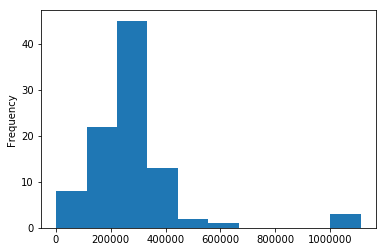

In [42]:
plt.figure()
df['salary'].plot(kind='hist')
plt.show()

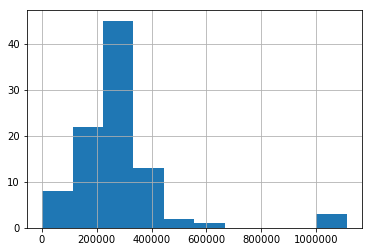

In [43]:
df['salary'].hist()
plt.show()

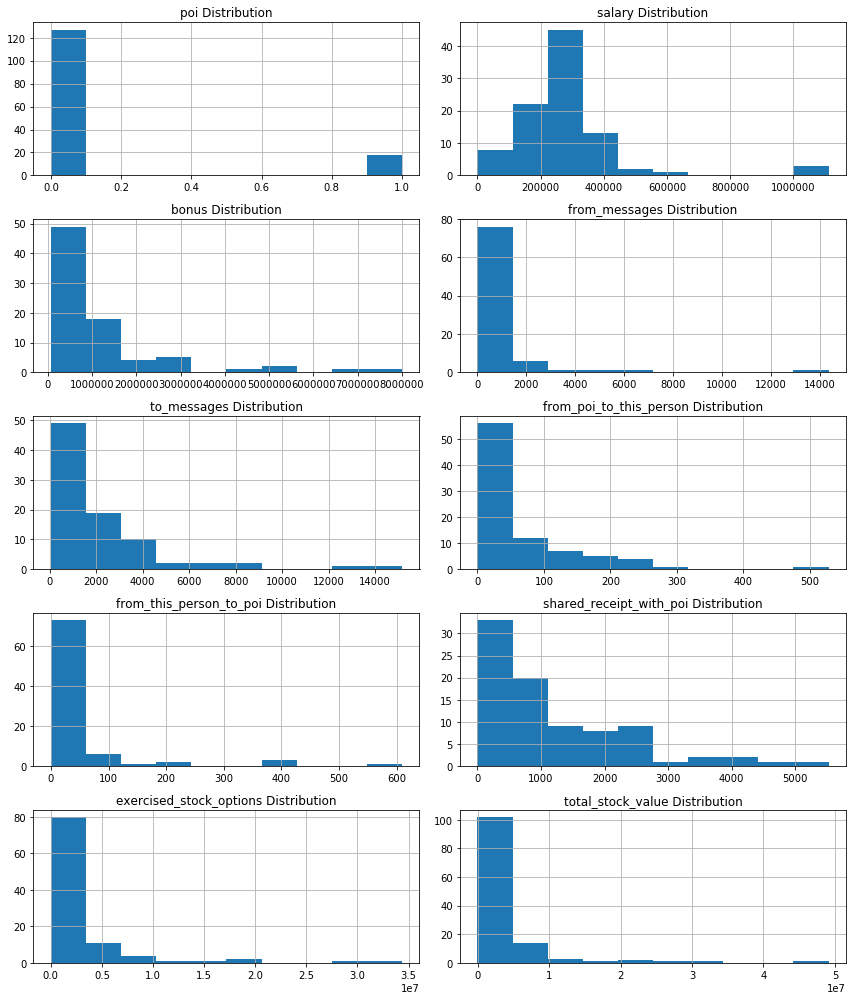

In [44]:
# Plotting all distributions 
# Ref: https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid

fig=plt.figure(figsize=(12,14))
for i, var_name in enumerate(features_list):
    ax=fig.add_subplot(5,2,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name+" Distribution")
fig.tight_layout()
plt.show()

In [45]:
df.columns.values

array(['poi', 'salary', 'bonus', 'from_messages', 'to_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'exercised_stock_options',
       'total_stock_value'], dtype=object)

In [46]:
range(0,3)

[0, 1, 2]

In [47]:
### Data Imputation Strategy
df.describe()

,salary,bonus,from_messages,to_messages,from_poi_to_this_person,from_this_person_to_poi,shared_receipt_with_poi,exercised_stock_options,total_stock_value
count,9.400000e+01,8.100000e+01,86.000000,86.000000,86.000000,86.000000,86.000000,1.010000e+02,1.250000e+02
mean,2.840875e+05,1.201773e+06,608.790698,2073.860465,64.895349,41.232558,1176.465116,2.959559e+06,3.352073e+06
std,1.771311e+05,1.441679e+06,1841.033949,2582.700981,86.979244,100.073111,1178.317641,5.499450e+06,6.532883e+06
min,4.770000e+02,7.000000e+04,12.000000,57.000000,0.000000,0.000000,2.000000,3.285000e+03,-4.409300e+04
25%,2.118020e+05,4.250000e+05,22.750000,541.250000,10.000000,1.000000,249.750000,5.067650e+05,4.941360e+05
50%,2.587410e+05,7.500000e+05,41.000000,1211.000000,35.000000,8.000000,740.500000,1.297049e+06,1.095040e+06
75%,3.086065e+05,1.200000e+06,145.500000,2634.750000,72.250000,24.750000,1888.250000,2.542813e+06,2.606763e+06
max,1.111258e+06,8.000000e+06,14368.000000,15149.000000,528.000000,609.000000,5521.000000,3.434838e+07,4.911008e+07


In [48]:
df.isnull().any()

poi                        False
salary                      True
bonus                       True
from_messages               True
to_messages                 True
from_poi_to_this_person     True
from_this_person_to_poi     True
shared_receipt_with_poi     True
exercised_stock_options     True
total_stock_value           True
dtype: bool

In [49]:
# Ref: https://machinelearningmastery.com/handle-missing-data-python/
from sklearn.preprocessing import Imputer
# fill missing values with median column values
values = df.values
features = values[:, 1:]
labels = values[:, 0]
imputer = Imputer(strategy='median')
transformed_features = imputer.fit_transform(features)
# count the number of NaN values in each column
print(numpy.isnan(transformed_features).sum())

0


In [50]:
df.values[:, 0]

array([False, False, False, False, True, False, False, False, False, False,
       False, False, False, False, False, False, True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, True, False, False, False, False, False, False, False, False,
       False, False, True, False, False, False, False, False, False, False,
       False, False, False, False, True, False, False, False, False, False,
       False, True, False, False, False, False, True, False, False, False,
       False, False, False, False, False, False, False, True, False, False,
       False, False, False, True, False, False, True, False, True, True,
       False, False, False, False, False, False, True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, True, True, False,
       False, False, False, False, 

In [51]:
transformed_features[:, 8]

array([  5.85062000e+05,   1.06232580e+07,   6.67873500e+06,
         1.03818500e+06,   6.39106500e+06,   2.08510000e+05,
         9.55873000e+05,   1.66285500e+06,   7.25664800e+06,
         8.80290000e+05,   2.28276800e+06,   1.09504000e+06,
         9.54354000e+05,   6.98920000e+05,   2.21827500e+06,
         3.72205000e+05,   6.98242000e+05,   1.41684800e+06,
         7.25735000e+05,   3.84930000e+05,   1.03032900e+06,
         5.89899700e+06,   5.47143000e+05,   1.09504000e+06,
        -4.40930000e+04,   2.07203500e+06,   1.09504000e+06,
         6.59249000e+05,   1.09504000e+06,   1.84381600e+06,
         1.91888700e+06,   9.87180000e+04,   1.26027000e+05,
         2.21729900e+06,   1.00894100e+06,   1.09504000e+06,
         4.41096000e+05,   1.89518000e+05,   8.50477000e+05,
         1.51418000e+05,   7.58931000e+05,   9.85032000e+05,
         3.60528000e+05,   5.16714400e+06,   2.49361600e+06,
         2.02786500e+06,   1.09504000e+06,   1.09504000e+06,
         8.77611000e+05,

In [52]:
len(transformed_features)

145

In [53]:
### Task 3: Create new feature(s)
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [56]:
('NaN' * 2) not in [0, 'NaN', 'NaNNaN']

False

In [92]:
from __future__ import division

for name in data_dict:
    total_emails = data_dict[name]['from_messages'] + data_dict[name]['to_messages']
    total_poi_related_emails = data_dict[name]['from_poi_to_this_person'] + data_dict[name]['from_this_person_to_poi']
    if (total_emails not in [0, 'NaN', 'NaNNaN']) and data_dict[name]['from_poi_to_this_person'] != 'NaN' and data_dict[name]['from_this_person_to_poi'] != 'NaN':
        data_dict[name]['poi_related_ratio'] = total_poi_related_emails / total_emails
    else:
        data_dict[name]['poi_related_ratio'] = 'NaN'

In [56]:
for name in data_dict:
    print name

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC

In [165]:
enron_data = {'Ben': {'poi': 1, 'salary': 70000}, 'Sara': {'poi': 0, 'salary': 70000}}
enron_data['Ben']["New Feature"] = 2 / 10

In [126]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

# Classifier.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()


# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_rescaled =  scaler.fit_transform(features)
spam = (features, features_rescaled)
features_test = numpy.array([[200000., 1000000.]])
features_test_transformed = scaler.fit_transform(features_test)

# Select KBest
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(k=6)
features = kbest.fit_transform(features_rescaled, labels)
print select.scores_, "\n"

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features_rescaled)
print pca.explained_variance_ratio_
first_pc = pca.components_[0]
second_pc = pca.components_[1]

# Train
clf.fit(features, labels)

[ 15.14904119  17.8573624    0.24111688   1.09816847   4.1460684
   1.90840396   6.8822438   21.71552656  21.05899501] 

[ 0.51968343  0.21637565]


GaussianNB(priors=None)

In [123]:
print features_rescaled.shape
print features.shape

(132L, 9L)
(132L, 6L)


In [119]:
print kbest.get_support()

[ True  True False False  True False  True  True  True]


In [130]:
pred = clf.predict(features)

In [131]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, labels)
print "\n", accuracy


0.863636363636


In [75]:
features_rescaled[:3]

array([[  1.81735475e-01,   5.21875000e-01,   1.52770045e-01,
          1.91563800e-01,   8.90151515e-02,   1.06732348e-01,
          2.54845137e-01,   5.03529074e-02,   3.60830823e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   7.50594264e-03,   6.14210338e-03],
       [  4.29243254e-04,   0.00000000e+00,   2.01837416e-03,
          3.73622021e-02,   7.38636364e-02,   0.00000000e+00,
          8.42238725e-02,   1.17797594e-01,   1.07571339e-01]])

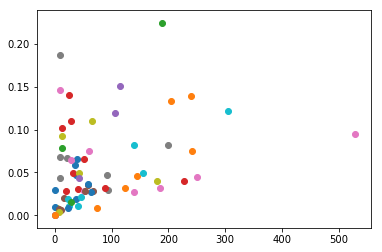

In [95]:
# Draw scatterplot
for name in data_dict:
    data_point = data_dict[name]
    if data_point['salary'] != 'NaN':
        plt.scatter(data_point['from_poi_to_this_person'], data_point['poi_related_ratio'])